<a href="https://colab.research.google.com/github/kev841/python-projects/blob/main/studentscore%20predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

data = {
    'Hours':[1,2,3,4.5,5,6.1,7,8,9.2,10],
    'Score':[20, 35, 45, 50, 60, 62, 70, 85, 88, 95]
  }

df = pd.DataFrame(data)
df


,Hours,Score
0,1.0,20
1,2.0,35
2,3.0,45
3,4.5,50
4,5.0,60
5,6.1,62
6,7.0,70
7,8.0,85
8,9.2,88
9,10.0,95


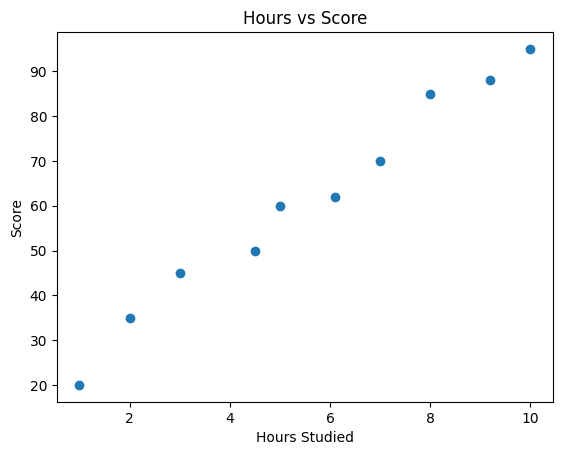

In [3]:
plt.scatter(df['Hours'], df['Score'])
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()


Slope (m): 8.152336530845727
Intercept (c): 15.42572384053507
   Actual  Predicted
8      88  90.427220
1      35  31.730397


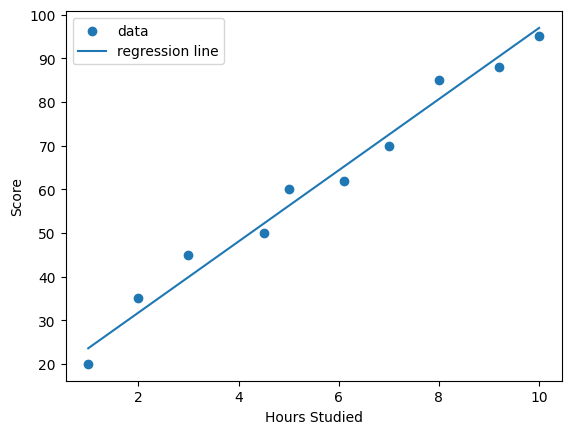

Mean Absolute Error (MAE): 2.85
R² score: 0.99
Predicted score for 7.5 hours: 76.57


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [4]:
X = df[['Hours']]  # double brackets -> DataFrame (2D)
y = df['Score']    # single brackets -> Series (1D)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)
y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)
# better: sort X for a clean line plot
xp = X.sort_values(by='Hours')
plt.scatter(X['Hours'], y, label='data')
plt.plot(xp['Hours'], model.predict(xp), label='regression line')
plt.legend()
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² score: {r2:.2f}")
hours = 7.5
predicted_score = model.predict([[hours]])   # note: 2D array
print(f"Predicted score for {hours} hours: {predicted_score[0]:.2f}")
